In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/s

In [3]:
import keras

Using TensorFlow backend.


In [17]:
from sklearn.model_selection import train_test_split

In [44]:
import matplotlib.pyplot as plt

In [4]:
import os
import cv2
import numpy as np

In [5]:
DATA_FOLDER = "../data/Simulator/"

In [6]:
normal = os.path.join(DATA_FOLDER,"CenterLaneDriving")
recovery = os.path.join(DATA_FOLDER,"RecoveryLap")
difficult = os.path.join(DATA_FOLDER,"Difficult")

In [7]:
names = ["Center Image","Left Image","Right Image","Steering", "Throttle", "Brake", "Speed"]

In [8]:
normal_driving_log = pd.read_csv(os.path.join(normal,"driving_log.csv"),names = names)

In [9]:
normal_driving_log.head()

,Center Image,Left Image,Right Image,Steering,Throttle,Brake,Speed
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.892318
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.811010
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.750371
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.670085
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.128493,0,9.627087


<AxesSubplot:>

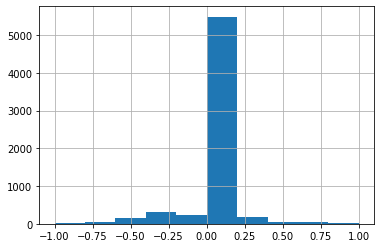

In [10]:
normal_driving_log["Steering"].hist(bins=10)

In [11]:

recovery_driving_log = pd.read_csv(os.path.join(recovery,"driving_log.csv"),names = names)

In [12]:
recovery_driving_log.head()

,Center Image,Left Image,Right Image,Steering,Throttle,Brake,Speed
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,3.034396
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,3.011356
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.988503
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.971483
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.948949


<AxesSubplot:>

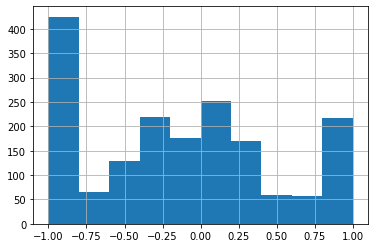

In [13]:
recovery_driving_log[recovery_driving_log["Steering"]!=0.0]["Steering"].hist()

In [14]:
full_driving_log = pd.concat([normal_driving_log,recovery_driving_log])

In [15]:
data = full_driving_log[["Center Image","Steering"]]

In [16]:
data.head()

,Center Image,Steering
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0


In [18]:
train,test =train_test_split(data)

<AxesSubplot:>

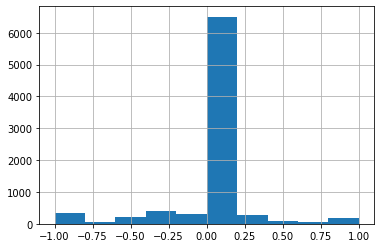

In [19]:
train["Steering"].hist()

<AxesSubplot:>

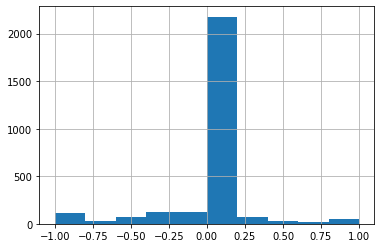

In [20]:
test["Steering"].hist()

In [38]:
def preprocess(images):
    images = images[:,60:140,:]
    images = images/255
    return images

In [39]:
def read_images(batch):
    images = [None]*len(batch)
    for i,image_name in enumerate(batch):
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images[i] = image
    images = np.array(images)
    return preprocess(images)
    

In [40]:
def loader(data,batch_size):
    for i in range(0,data.shape[0],batch_size):
        batch = data.iloc[i:i+batch_size]
        batch_image_names = batch["Center Image"].values.tolist()
        batch_images = read_images(batch_image_names)
        if i%batch_size==0:
            print("===DEBUG===")
            print(batch_images.shape)
            print("===DEBUG===")
            yield batch_images
            

In [41]:
for images in loader(train,32):
    print(images.shape)
    break

===DEBUG===
(32, 80, 320, 3)
===DEBUG===
(32, 80, 320, 3)


In [42]:
image = images[1]

In [43]:
image.shape

(80, 320, 3)

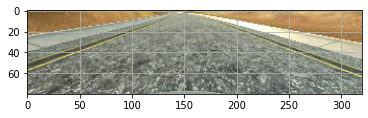

In [46]:
plt.imshow(image)
plt.grid()

In [47]:
from keras.models import Sequential

In [48]:
from keras import layers

In [49]:
model = Sequential()

In [51]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 320, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 318, 32)       896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
